<a href="https://colab.research.google.com/github/HarshiniRajasekaran/Diagnosis-of-grape-leaf-diseases/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# <<<<<<<<<<<<<<<<<<<<<< This is the cell to be executed >>>>>>>>>>>>>>>>>>>>>>>>>>>

import glob
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import os

new_dir = '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/Grape___Esca_(Black_Measles)'
output_dir = '/content/drive/MyDrive/shadow_rmvd_dataset3'  # specify your output directory here

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for i in os.listdir(new_dir)[:2]:
  img_path = os.path.join(new_dir, i)
  img = iio.imread(img_path)

  # convert the image to grayscale
  gray_img = ski.color.rgb2gray(img)

  # blur the image to denoise
  blurred_img = ski.filters.gaussian(gray_img, sigma=1.0)

  min_value = np.min(blurred_img)
  max_value = np.max(blurred_img)

  # Normalize the image to range [0, 1]
  normalized_img = (blurred_img - min_value) / (max_value - min_value)
  blurred_img = normalized_img

  # Create a binary mask based on the threshold
  if 'rot' in i:
    binary_mask = blurred_img > 0.178
  elif 'measles' in i:
    binary_mask = blurred_img > 0.14
  elif 'blight' in i:
    binary_mask = blurred_img > 0.18
  else:
    binary_mask = blurred_img > 0.22

  masked_img = np.zeros_like(gray_img)
  masked_img[binary_mask] = blurred_img[binary_mask]

  # Save the masked image to the output directory
  output_path = os.path.join(output_dir, os.path.basename(i))
  iio.imsave(output_path, ski.img_as_ubyte(masked_img))  # convert the image data to uint8 type before saving


<ipython-input-6-2fa91b64ce52>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(img_path)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display , Image
from scipy import ndimage
from PIL import Image
dir = '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset'
new_dir = '/content/drive/MyDrive/bgrnd_rmwd_dataset'
os.makedirs(new_dir , exist_ok=True)
for img in os.listdir(dir):
  i = img = os.path.join(dir , img)
  img = cv2.imread(img ,0)

  img = cv2.GaussianBlur(img , (3 , 3),0)
  edge = cv2.Canny(img , 5000, 14000, apertureSize = 7 ,L2gradient=True)

  kernel = np.ones((3,3) , dtype=np.uint8)
  dilated_img = cv2.dilate(edge, kernel, iterations=1)

  filled_img = ndimage.binary_fill_holes(dilated_img).astype(int)

  original = Image.open(i)
  filled_img_uint8 = (filled_img * 255).astype(np.uint8)
  bw = Image.fromarray(filled_img_uint8)
  mask = bw.convert('1')
  result = Image.composite(original, Image.new('RGB', original.size), mask)

  # Define the path where you want to save the result
  output_path = os.path.join(new_dir, os.path.basename(i))

  # Save the result
  result.save(output_path)

In [ ]:
'''import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

dir = '/content/drive/MyDrive/dataset/kmeans_before_dataset'
new_dir = '/content/drive/MyDrive/dataset/only_da_dataset'  # New directory for final images

# Create the new directory if it doesn't exist
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

files = os.listdir(dir)

for file in files:
    # Load your image
    img_path = os.path.join(dir, file)
    img = cv2.imread(img_path)

    # Create an empty image of the same size
    new_img = np.zeros(img.shape, np.uint8)

    # Find the indices where the red intensity is higher than the green intensity
    red_pixels = img[:,:,2] > img[:,:,1]

    # Set those pixels to red in the new image
    new_img[red_pixels] = [255, 255, 255]

    # Find the indices where the green intensity is higher than the red intensity
    green_pixels = img[:,:,1] > img[:,:,2]
    b_pixels =  img[:,:,0] > img[:,:,2]

    # Set those pixels to green in the new image
    new_img[green_pixels] = [0, 0, 0]
    new_img[b_pixels] = [0,0,0]

    # Convert the binary image to a boolean mask
    mask = new_img[:,:,0] == 255

    # Apply the mask to the original image
    final_img = cv2.bitwise_and(img, img, mask=mask.astype(np.uint8))

    # Save the final image in the new directory
    cv2.imwrite(os.path.join(new_dir, file), final_img)
'''

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the BGR code for brown
brown_bgr = np.array([11 , 70 , 58])

# Load the image
dir = '/content/drive/MyDrive/dataset/kmeans_before_dataset'
files = os.listdir(dir)
new_dir = '/content/drive/MyDrive/dataset/kmeans_after_dataset'
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

for file in files:
  img = os.path.join(dir , file)
  img = cv2.imread(img)

  # Reshape the image to a 2D array of pixels
  pixels = img.reshape((-1, 3))

  # Convert to floating point
  pixels = np.float32(pixels)

  # Define criteria and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.9)
  k = 5
  _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # Convert back to 8 bit values
  centers = np.uint8(centers)

  # Calculate the Euclidean distance of each cluster to brown
  distances = np.linalg.norm(centers - brown_bgr, axis=1)

  # Find the brownest cluster
  brownest_cluster = np.argmin(distances)

  # Create a mask for the brownest cluster
  mask = labels.flatten() == brownest_cluster

  # Create an image for the brownest cluster by masking the other clusters
  cluster_img = np.zeros_like(pixels)
  cluster_img[mask] = pixels[mask]

  # Change unmasked pixels to white
  cluster_img[~mask] = [0, 0, 0]

  # Reshape back to the original image
  cluster_img = cluster_img.reshape(img.shape)

  # Save the image with the same name
  cv2.imwrite(os.path.join(new_dir, file), cv2.cvtColor(cluster_img, cv2.COLOR_BGR2RGB))


In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
import shutil
import os

# List of source directories
source_dirs = [
    '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/blight',
    '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/msls',
    '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/rot',
    '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/hl'
]

# Destination directory
dest_dir = '/content/drive/MyDrive/dataset/only_da_dataset'

# Iterate over each source directory
for source_dir in source_dirs:
    # Iterate over each file in the source directory
    for filename in os.listdir(source_dir):
        # Construct full file path
        source = os.path.join(source_dir, filename)
        destination = os.path.join(dest_dir, filename)
        # Copy the file to the destination directory
        shutil.copy(source, destination)

print("Files copied successfully.")


Files copied successfully.


In [ ]:
import os

source_dir = '/content/drive/MyDrive/dataset/only_da_dataset'
target_dirs = {
    'Blight': '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/blight',
    'Msls': '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/msls',
    'Rot': '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/rot',
    'HL': '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/hl'
}

# Create target directories if they don't exist
for dir in target_dirs.values():
    if not os.path.exists(dir):
        os.makedirs(dir)

# Iterate over files in the source directory
for filename in os.listdir(source_dir):
    for keyword in target_dirs.keys():
        # If the keyword is in the filename, move it to the corresponding directory
        if keyword in filename:
            os.rename(os.path.join(source_dir, filename), os.path.join(target_dirs[keyword], filename))


In [ ]:
'''import os
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing import image

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

source_dir = '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/selected_blight'
target_dir = '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/aug_blight'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

for file in os.listdir(source_dir)[:27]:
    img_path = os.path.join(source_dir, file)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=target_dir, save_prefix=file + str(i), save_format='jpeg'):
        i += 1
        if i > 20:  # create 20 augmented images per original image
            break
'''

In [ ]:
import shutil
import os

# Define your source directories
source_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/aug_blight',
               '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/aug_msls',
               '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/aug_rot',
               '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/hl']

# Define your destination directory
dest_dir = '/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset'

# Ensure the destination directory exists
os.makedirs(dest_dir, exist_ok=True)

# Iterate over each source directory
for source_dir in source_dirs:
    # Ensure the source directory exists
    if os.path.exists(source_dir):
        # Iterate over each file in the source directory
        for file_name in os.listdir(source_dir):
            # Construct full file path
            source_file = os.path.join(source_dir, file_name)
            # Copy each file to the destination directory
            shutil.copy(source_file, dest_dir)
    else:
        print(f"Source directory {source_dir} does not exist.")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_features_glcm.csv')

In [ ]:
def classify_name(name):
    if 'Rot' in name:
        return 'Rot'
    elif 'Msls' in name:
        return 'Msls'
    elif 'HL' in name:
        return 'HL'
    elif 'Blight' in name:
        return 'Blight'
    else:
        return 'Unknown'

# Apply the function to the 'Image' column and create a new 'class' column
new_df['class'] = new_df['Image'].apply(classify_name)
new_df.head()

Unnamed: 0                                              Image  \
0           0  /content/drive/MyDrive/Grape Plant from Plant ...   
1           1  /content/drive/MyDrive/Grape Plant from Plant ...   
2           2  /content/drive/MyDrive/Grape Plant from Plant ...   
3           3  /content/drive/MyDrive/Grape Plant from Plant ...   
4           4  /content/drive/MyDrive/Grape Plant from Plant ...   

   R_contrast_0  R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0     62.763664         0.904144    0.849878         0.939948  4.664062   
1     60.069041         0.900356    0.849656         0.960272  6.554169   
2     89.073820         0.900551    0.867483         0.932775  5.672668   
3     67.871952         0.898121    0.831010         0.946538  5.613297   
4     59.727037         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  ...    V_Mean  \
0             22.817283   1.289239  2.614382  ...  4.829300   
1             27.453210   1.396968  2.849603  ...  6.711533   
2             25.691265   1.239135  2.672480  ...  5.812561   
3             25.147812   1.448733  2.803401  ...  5.784210   
4             22.850870   1.047213  2.371547  ...  4.429916   

   V_Standard Deviation  V_Entropy     V_RMS  V_Variance  V_Smoothness  \
0             22.789138   1.578955  2.751234  519.344809      0.998078   
1             27.413162   1.681130  2.967724  751.481469      0.998671   
2             25.657322   1.489890  2.790550  658.298180      0.998483   
3             25.113554   1.741516  2.939369  630.690617      0.998417   
4             22.825551   1.344241  2.538969  521.005800      0.998084   

   V_Kurtosis  V_Skewness     V_IDM  class  
0   35.052851    5.797668  0.888264    Rot  
1   22.280818    4.701920  0.884046    Rot  
2   27.318447    5.158326  0.886156    Rot  
3   28.194092    5.233101  0.880638    Rot  
4   40.344463    6.219304  0.903894    Rot  

[5 rows x 81 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Drop the 'Image' and 'class' columns
X = new_df.drop(['Image', 'class'], axis=1)
y = new_df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVC model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      Blight       0.98      1.00      0.99       247
          HL       1.00      1.00      1.00        81
        Msls       0.97      0.96      0.97       276
         Rot       0.98      0.97      0.98       275

    accuracy                           0.98       879
   macro avg       0.98      0.98      0.98       879
weighted avg       0.98      0.98      0.98       879

[[247   0   0   0]
 [  0  81   0   0]
 [  6   0 265   5]
 [  0   0   7 268]]


In [ ]:
pip install pandas==1.3.3

In [ ]:
#only_da_dataset
#1
#code end1
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)
df_combined3
df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined.csv')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

In [ ]:
df_combined3.head()


Folder                                              Image  R_contrast_0  \
0      0  /content/drive/MyDrive/Grape Plant from Plant ...     62.763664   
1      0  /content/drive/MyDrive/Grape Plant from Plant ...     60.069041   
2      0  /content/drive/MyDrive/Grape Plant from Plant ...     89.073820   
3      0  /content/drive/MyDrive/Grape Plant from Plant ...     67.871952   
4      0  /content/drive/MyDrive/Grape Plant from Plant ...     59.727037   

   R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0         0.904144    0.849878         0.939948  4.664062   
1         0.900356    0.849656         0.960272  6.554169   
2         0.900551    0.867483         0.932775  5.672668   
3         0.898121    0.831010         0.946538  5.613297   
4         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  ...  V_correlation_0    V_Mean  \
0             22.817283   1.289239  2.614382  ...         0.939655  4.829300   
1             27.453210   1.396968  2.849603  ...         0.960092  6.711533   
2             25.691265   1.239135  2.672480  ...         0.932491  5.812561   
3             25.147812   1.448733  2.803401  ...         0.946325  5.784210   
4             22.850870   1.047213  2.371547  ...         0.942788  4.429916   

   V_Standard Deviation  V_Entropy     V_RMS  V_Variance  V_Smoothness  \
0             22.789138   1.578955  2.751234  519.344809      0.998078   
1             27.413162   1.681130  2.967724  751.481469      0.998671   
2             25.657322   1.489890  2.790550  658.298180      0.998483   
3             25.113554   1.741516  2.939369  630.690617      0.998417   
4             22.825551   1.344241  2.538969  521.005800      0.998084   

   V_Kurtosis  V_Skewness     V_IDM  
0   35.052851    5.797668  0.888264  
1   22.280818    4.701920  0.884046  
2   27.318447    5.158326  0.886156  
3   28.194092    5.233101  0.880638  
4   40.344463    6.219304  0.903894  

[5 rows x 80 columns]

In [ ]:
pip install pandas==1.3.3
#hhf

SyntaxError: invalid syntax (<ipython-input-17-3870e9f6172a>, line 1)

In [ ]:
#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

L_contrast_0  L_homogeneity_0  L_energy_0  L_correlation_0     L_Mean  \
0   1151.907399         0.856827    0.802007         0.690104  15.416153   
1   1249.534850         0.853866    0.801354         0.712871  17.020966   
2   1190.730499         0.858652    0.828991         0.669843  13.959595   
3   1164.263863         0.842897    0.779562         0.732273  18.073181   
4    928.775169         0.874637    0.839613         0.705541  12.537521   

   L_Standard Deviation  L_Entropy     L_RMS   L_Variance  L_Smoothness  \
0             43.077387   1.873264  4.615983  1855.661244      0.999461   
1             46.643688   1.945784  4.595686  2175.633624      0.999541   
2             42.454603   1.708295  4.273134  1802.393295      0.999445   
3             46.588616   2.068054  4.878836  2170.499100      0.999539   
4             39.660766   1.572538  4.126633  1572.976375      0.999365   

   L_Kurtosis  L_Skewness     L_IDM  
0   11.500049    3.368449  0.856827  
1    9.837231    3.180510  0.853866  
2   12.965461    3.594324  0.858652  
3    9.026044    3.033057  0.842897  
4   14.844924    3.803340  0.874637

In [ ]:
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/plz_be_final_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

a_contrast_0  a_homogeneity_0  a_energy_0  a_correlation_0     a_Mean  \
0   1574.588848         0.869261    0.826537         0.724500  20.149475   
1   1580.198683         0.864651    0.826454         0.723046  20.092606   
2   1584.868796         0.869600    0.843061         0.696645  18.015182   
3   1800.293382         0.855618    0.813784         0.706752  21.589279   
4   1332.989859         0.886238    0.855060         0.724967  16.720581   

   a_Standard Deviation  a_Entropy     a_RMS   a_Variance  a_Smoothness  \
0             53.398249   1.688176  3.941877  2851.372982      0.999649   
1             53.370141   1.752970  4.069081  2848.371963      0.999649   
2             51.102486   1.593392  3.788239  2611.464110      0.999617   
3             55.333225   1.826929  4.172491  3061.765833      0.999673   
4             49.192316   1.452988  3.671688  2419.883931      0.999587   

   a_Kurtosis  a_Skewness     a_IDM  
0    6.464764    2.736505  0.869261  
1    6.629134    2.760279  0.864651  
2    7.825627    2.964791  0.869600  
3    5.801827    2.625265  0.855618  
4    8.691487    3.093459  0.886238

In [ ]:
dfa2.head()

a_contrast_0  a_homogeneity_0  a_energy_0  a_correlation_0     a_Mean  \
0   1574.588848         0.869261    0.826537         0.724500  20.149475   
1   1580.198683         0.864651    0.826454         0.723046  20.092606   
2   1584.868796         0.869600    0.843061         0.696645  18.015182   
3   1800.293382         0.855618    0.813784         0.706752  21.589279   
4   1332.989859         0.886238    0.855060         0.724967  16.720581   

   a_Standard Deviation  a_Entropy     a_RMS   a_Variance  a_Smoothness  \
0             53.398249   1.688176  3.941877  2851.372982      0.999649   
1             53.370141   1.752970  4.069081  2848.371963      0.999649   
2             51.102486   1.593392  3.788239  2611.464110      0.999617   
3             55.333225   1.826929  4.172491  3061.765833      0.999673   
4             49.192316   1.452988  3.671688  2419.883931      0.999587   

   a_Kurtosis  a_Skewness     a_IDM  
0    6.464764    2.736505  0.869261  
1    6.629134    2.760279  0.864651  
2    7.825627    2.964791  0.869600  
3    5.801827    2.625265  0.855618  
4    8.691487    3.093459  0.886238

In [ ]:
# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

In [ ]:
dfb.head()

Bl_contrast_0  Bl_homogeneity_0  Bl_energy_0  Bl_correlation_0    Bl_Mean  \
0    1301.441774          0.869165     0.826538          0.716684  17.396439   
1    1292.258012          0.864459     0.826439          0.730441  17.990738   
2    1243.948284          0.869556     0.843015          0.707861  15.887192   
3    1315.208471          0.855452     0.813799          0.739823  19.113434   
4     984.074004          0.886193     0.855030          0.745013  14.565430   

   Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  \
0              47.865462    1.684455  3.906154  2291.102434       0.999564   
1              48.920453    1.745613  3.880841  2393.210684       0.999582   
2              46.131088    1.591456  3.658209  2128.077286       0.999530   
3              50.208632    1.821821  4.080676  2520.906688       0.999603   
4              43.909834    1.452035  3.603206  1928.073539       0.999482   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0     8.762388     3.045275  0.869165  
1     8.251358     2.972850  0.864459  
2     9.889289     3.212987  0.869556  
3     7.528916     2.861715  0.855452  
4    11.039150     3.363525  0.886193

In [ ]:
df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

L_contrast_0  L_homogeneity_0  L_energy_0  L_correlation_0     L_Mean  \
0      1151.907399         0.856827    0.802007         0.690104  15.416153   
1      1249.534850         0.853866    0.801354         0.712871  17.020966   
2      1190.730499         0.858652    0.828991         0.669843  13.959595   
3      1164.263863         0.842897    0.779562         0.732273  18.073181   
4       928.775169         0.874637    0.839613         0.705541  12.537521   
...            ...              ...         ...              ...        ...   
4388   4849.051685         0.517550    0.472186         0.589851  56.966522   
4389   4197.759620         0.572021    0.527288         0.614383  49.485535   
4390   4184.829182         0.578018    0.524474         0.608970  48.672318   
4391   5014.134773         0.495397    0.455720         0.574829  57.173676   
4392   4287.292111         0.557095    0.505389         0.605654  50.781250   

      L_Standard Deviation  L_Entropy     L_RMS   L_Variance  L_Smoothness  \
0                43.077387   1.873264  4.615983  1855.661244      0.999461   
1                46.643688   1.945784  4.595686  2175.633624      0.999541   
2                42.454603   1.708295  4.273134  1802.393295      0.999445   
3                46.588616   2.068054  4.878836  2170.499100      0.999539   
4                39.660766   1.572538  4.126633  1572.976375      0.999365   
...                    ...        ...       ...          ...           ...   
4388             76.857610   4.935207  7.463682  5907.092202      0.999831   
4389             73.732918   4.460625  7.046856  5436.543156      0.999816   
4390             73.133574   4.452726  7.073449  5348.519654      0.999813   
4391             76.747090   5.007844  7.564283  5890.115772      0.999830   
4392             73.650845   4.596948  7.184963  5424.446930      0.999816   

      ...  Bl_correlation_0    Bl_Mean  Bl_Standard Deviation  Bl_Entropy  \
0     ...          0.716684  17.396439              47.865462    1.684455   
1     ...          0.730441  17.990738              48.920453    1.745613   
2     ...          0.707861  15.887192              46.131088    1.591456   
3     ...          0.739823  19.113434              50.208632    1.821821   
4     ...          0.745013  14.565430              43.909834    1.452035   
...   ...               ...        ...                    ...         ...   
4388  ...          0.600271  60.728729              78.948521    4.847762   
4389  ...          0.621051  53.269821              75.926600    4.370891   
4390  ...          0.625169  53.588638              75.895651    4.380281   
4391  ...          0.583600  62.028427              78.795149    4.923375   
4392  ...          0.620689  55.699036              76.645471    4.501201   

        Bl_RMS  Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0     3.906154  2291.102434       0.999564     8.762388     3.045275  0.869165  
1     3.880841  2393.210684       0.999582     8.251358     2.972850  0.864459  
2     3.658209  2128.077286       0.999530     9.889289     3.212987  0.869556  
3     4.080676  2520.906688       0.999603     7.528916     2.861715  0.855452  
4     3.603206  1928.073539       0.999482    11.039150     3.363525  0.886193  
...        ...          ...            ...          ...          ...       ...  
4388  7.158354  6232.868948       0.999840    -0.375958     1.009272  0.528234  
4389  6.764665  5764.848568       0.999827     0.072109     1.198766  0.580640  
4390  6.756750  5760.149797       0.999826     0.066250     1.193144  0.587345  
4391  7.252301  6208.675568       0.999839    -0.434092     0.974755  0.503729  
4392  6.880447  5874.528286       0.999830    -0.081064     1.131983  0.568338  

[4393 rows x 39 columns]

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/fin.csv')
df.head()

Unnamed: 0                                              Image  \
0           0  /content/drive/MyDrive/Grape Plant from Plant ...   
1           1  /content/drive/MyDrive/Grape Plant from Plant ...   
2           2  /content/drive/MyDrive/Grape Plant from Plant ...   
3           3  /content/drive/MyDrive/Grape Plant from Plant ...   
4           4  /content/drive/MyDrive/Grape Plant from Plant ...   

   R_contrast_0  R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0     62.763664         0.904144    0.849878         0.939948  4.664062   
1     60.069041         0.900356    0.849656         0.960272  6.554169   
2     89.073820         0.900551    0.867483         0.932775  5.672668   
3     67.871952         0.898121    0.831010         0.946538  5.613297   
4     59.727037         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  ...  V_correlation_0    V_Mean  \
0             22.817283   1.289239  2.614382  ...         0.939655  4.829300   
1             27.453210   1.396968  2.849603  ...         0.960092  6.711533   
2             25.691265   1.239135  2.672480  ...         0.932491  5.812561   
3             25.147812   1.448733  2.803401  ...         0.946325  5.784210   
4             22.850870   1.047213  2.371547  ...         0.942788  4.429916   

   V_Standard Deviation  V_Entropy     V_RMS  V_Variance  V_Smoothness  \
0             22.789138   1.578955  2.751234  519.344809      0.998078   
1             27.413162   1.681130  2.967724  751.481469      0.998671   
2             25.657322   1.489890  2.790550  658.298180      0.998483   
3             25.113554   1.741516  2.939369  630.690617      0.998417   
4             22.825551   1.344241  2.538969  521.005800      0.998084   

   V_Kurtosis  V_Skewness     V_IDM  
0   35.052851    5.797668  0.888264  
1   22.280818    4.701920  0.884046  
2   27.318447    5.158326  0.886156  
3   28.194092    5.233101  0.880638  
4   40.344463    6.219304  0.903894  

[5 rows x 80 columns]

In [ ]:
# Assuming 'df' is your DataFrame
df=pd.concat([df,df_final],axis=1)
df.head()

Unnamed: 0                                              Image  \
0           0  /content/drive/MyDrive/Grape Plant from Plant ...   
1           1  /content/drive/MyDrive/Grape Plant from Plant ...   
2           2  /content/drive/MyDrive/Grape Plant from Plant ...   
3           3  /content/drive/MyDrive/Grape Plant from Plant ...   
4           4  /content/drive/MyDrive/Grape Plant from Plant ...   

   R_contrast_0  R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0     62.763664         0.904144    0.849878         0.939948  4.664062   
1     60.069041         0.900356    0.849656         0.960272  6.554169   
2     89.073820         0.900551    0.867483         0.932775  5.672668   
3     67.871952         0.898121    0.831010         0.946538  5.613297   
4     59.727037         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  ...  Bl_correlation_0  \
0             22.817283   1.289239  2.614382  ...          0.716684   
1             27.453210   1.396968  2.849603  ...          0.730441   
2             25.691265   1.239135  2.672480  ...          0.707861   
3             25.147812   1.448733  2.803401  ...          0.739823   
4             22.850870   1.047213  2.371547  ...          0.745013   

     Bl_Mean  Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  \
0  17.396439              47.865462    1.684455  3.906154  2291.102434   
1  17.990738              48.920453    1.745613  3.880841  2393.210684   
2  15.887192              46.131088    1.591456  3.658209  2128.077286   
3  19.113434              50.208632    1.821821  4.080676  2520.906688   
4  14.565430              43.909834    1.452035  3.603206  1928.073539   

   Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0       0.999564     8.762388     3.045275  0.869165  
1       0.999582     8.251358     2.972850  0.864459  
2       0.999530     9.889289     3.212987  0.869556  
3       0.999603     7.528916     2.861715  0.855452  
4       0.999482    11.039150     3.363525  0.886193  

[5 rows x 119 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/fin_new.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/fin_new.csv')

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                               Image  R_contrast_0  \
0  /content/drive/MyDrive/Grape Plant from Plant ...     62.763664   
1  /content/drive/MyDrive/Grape Plant from Plant ...     60.069041   
2  /content/drive/MyDrive/Grape Plant from Plant ...     89.073820   
3  /content/drive/MyDrive/Grape Plant from Plant ...     67.871952   
4  /content/drive/MyDrive/Grape Plant from Plant ...     59.727037   

   R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0         0.904144    0.849878         0.939948  4.664062   
1         0.900356    0.849656         0.960272  6.554169   
2         0.900551    0.867483         0.932775  5.672668   
3         0.898121    0.831010         0.946538  5.613297   
4         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy  ...  Bl_correlation_0    Bl_Mean  \
0             22.817283   1.289239  ...          0.716684  17.396439   
1             27.453210   1.396968  ...          0.730441  17.990738   
2             25.691265   1.239135  ...          0.707861  15.887192   
3             25.147812   1.448733  ...          0.739823  19.113434   
4             22.850870   1.047213  ...          0.745013  14.565430   

   Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  \
0              47.865462    1.684455  3.906154  2291.102434       0.999564   
1              48.920453    1.745613  3.880841  2393.210684       0.999582   
2              46.131088    1.591456  3.658209  2128.077286       0.999530   
3              50.208632    1.821821  4.080676  2520.906688       0.999603   
4              43.909834    1.452035  3.603206  1928.073539       0.999482   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0     8.762388     3.045275  0.869165  
1     8.251358     2.972850  0.864459  
2     9.889289     3.212987  0.869556  
3     7.528916     2.861715  0.855452  
4    11.039150     3.363525  0.886193  

[5 rows x 120 columns]

In [ ]:
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [ ]:
df.head()

Image  R_contrast_0  \
0  /content/drive/MyDrive/Grape Plant from Plant ...     62.763664   
1  /content/drive/MyDrive/Grape Plant from Plant ...     60.069041   
2  /content/drive/MyDrive/Grape Plant from Plant ...     89.073820   
3  /content/drive/MyDrive/Grape Plant from Plant ...     67.871952   
4  /content/drive/MyDrive/Grape Plant from Plant ...     59.727037   

   R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0         0.904144    0.849878         0.939948  4.664062   
1         0.900356    0.849656         0.960272  6.554169   
2         0.900551    0.867483         0.932775  5.672668   
3         0.898121    0.831010         0.946538  5.613297   
4         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  R_Variance  ...  \
0             22.817283   1.289239  2.614382  520.628388  ...   
1             27.453210   1.396968  2.849603  753.678737  ...   
2             25.691265   1.239135  2.672480  660.041108  ...   
3             25.147812   1.448733  2.803401  632.412457  ...   
4             22.850870   1.047213  2.371547  522.162268  ...   

   Bl_correlation_0    Bl_Mean  Bl_Standard Deviation  Bl_Entropy    Bl_RMS  \
0          0.716684  17.396439              47.865462    1.684455  3.906154   
1          0.730441  17.990738              48.920453    1.745613  3.880841   
2          0.707861  15.887192              46.131088    1.591456  3.658209   
3          0.739823  19.113434              50.208632    1.821821  4.080676   
4          0.745013  14.565430              43.909834    1.452035  3.603206   

   Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0  2291.102434       0.999564     8.762388     3.045275  0.869165  
1  2393.210684       0.999582     8.251358     2.972850  0.864459  
2  2128.077286       0.999530     9.889289     3.212987  0.869556  
3  2520.906688       0.999603     7.528916     2.861715  0.855452  
4  1928.073539       0.999482    11.039150     3.363525  0.886193  

[5 rows x 118 columns]

In [ ]:
def classify_name(name):
    if 'Rot' in name:
        return 'Rot'
    elif 'Msls' in name:
        return 'Msls'
    elif 'HL' in name:
        return 'HL'
    elif 'Blight' in name:
        return 'Blight'
    else:
        return 'Unknown'

# Apply the function to the 'Image' column and create a new 'class' column
df['class'] = df['Image'].apply(classify_name)

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/all_removed_img_class.csv')

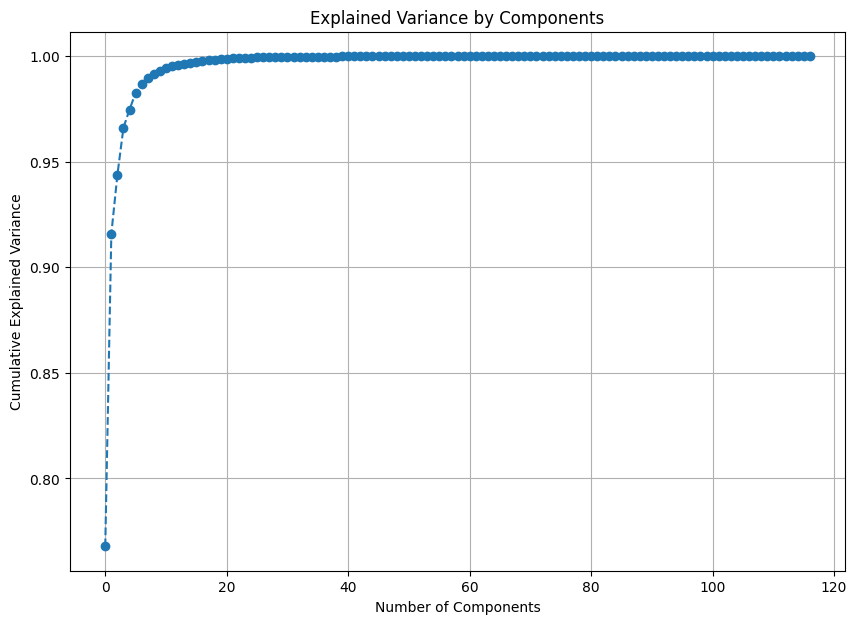

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.drop(columns = ['Image' , 'class'])
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plotting the variance explained by each principal component
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
df.head()

Image  R_contrast_0  \
0  /content/drive/MyDrive/Grape Plant from Plant ...     62.763664   
1  /content/drive/MyDrive/Grape Plant from Plant ...     60.069041   
2  /content/drive/MyDrive/Grape Plant from Plant ...     89.073820   
3  /content/drive/MyDrive/Grape Plant from Plant ...     67.871952   
4  /content/drive/MyDrive/Grape Plant from Plant ...     59.727037   

   R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0         0.904144    0.849878         0.939948  4.664062   
1         0.900356    0.849656         0.960272  6.554169   
2         0.900551    0.867483         0.932775  5.672668   
3         0.898121    0.831010         0.946538  5.613297   
4         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  R_Variance  ...    Bl_Mean  \
0             22.817283   1.289239  2.614382  520.628388  ...  17.396439   
1             27.453210   1.396968  2.849603  753.678737  ...  17.990738   
2             25.691265   1.239135  2.672480  660.041108  ...  15.887192   
3             25.147812   1.448733  2.803401  632.412457  ...  19.113434   
4             22.850870   1.047213  2.371547  522.162268  ...  14.565430   

   Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  \
0              47.865462    1.684455  3.906154  2291.102434       0.999564   
1              48.920453    1.745613  3.880841  2393.210684       0.999582   
2              46.131088    1.591456  3.658209  2128.077286       0.999530   
3              50.208632    1.821821  4.080676  2520.906688       0.999603   
4              43.909834    1.452035  3.603206  1928.073539       0.999482   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM  class  
0     8.762388     3.045275  0.869165    Rot  
1     8.251358     2.972850  0.864459    Rot  
2     9.889289     3.212987  0.869556    Rot  
3     7.528916     2.861715  0.855452    Rot  
4    11.039150     3.363525  0.886193    Rot  

[5 rows x 119 columns]

In [ ]:
!pip install ReliefF

In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=20)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931740614334471


In [ ]:
#kmeans_before_dataset
#2
#code end1
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)

df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined_bef.csv')
df_combined3

#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/kmeans_before_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()

# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)

df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

df=pd.concat([df_combined3,df_final],axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

KeyboardInterrupt: 

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/kbefore.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/kbefore.csv')
df=df.drop(['Unnamed: 0','Folder'],axis=1)

In [ ]:
df

Image  R_contrast_0  \
0     /content/drive/MyDrive/dataset/kmeans_before_d...    313.702711   
1     /content/drive/MyDrive/dataset/kmeans_before_d...    308.861612   
2     /content/drive/MyDrive/dataset/kmeans_before_d...    314.751072   
3     /content/drive/MyDrive/dataset/kmeans_before_d...    277.369930   
4     /content/drive/MyDrive/dataset/kmeans_before_d...    363.704504   
...                                                 ...           ...   
3418  /content/drive/MyDrive/dataset/kmeans_before_d...    203.063618   
3419  /content/drive/MyDrive/dataset/kmeans_before_d...    259.734651   
3420  /content/drive/MyDrive/dataset/kmeans_before_d...    155.787270   
3421  /content/drive/MyDrive/dataset/kmeans_before_d...    155.201348   
3422  /content/drive/MyDrive/dataset/kmeans_before_d...    180.708732   

      R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0            0.443201    0.384427         0.942622  51.655396   
1            0.499264    0.441771         0.970626  63.052795   
2            0.476578    0.420997         0.971558  70.782959   
3            0.419132    0.352737         0.952174  56.910767   
4            0.469998    0.419652         0.964992  70.268768   
...               ...         ...              ...        ...   
3418         0.486472    0.403845         0.924840  29.793320   
3419         0.444398    0.368697         0.948122  49.540497   
3420         0.503958    0.414828         0.975511  55.079819   
3421         0.460266    0.361182         0.950779  37.935501   
3422         0.507720    0.424674         0.960593  44.271927   

      R_Standard Deviation  R_Entropy     R_RMS   R_Variance  ...  \
0                52.281805   5.235270  7.708495  2733.387107  ...   
1                72.473631   5.098065  7.351668  5252.427175  ...   
2                74.372085   5.113388  7.445683  5531.207013  ...   
3                53.858629   5.435494  7.859691  2900.751895  ...   
4                72.067193   5.110090  7.414435  5193.680297  ...   
...                    ...        ...       ...          ...  ...   
3418             36.729156   4.922508  7.792783  1349.030876  ...   
3419             50.031437   5.288590  7.766317  2503.144692  ...   
3420             56.392719   4.928378  7.344177  3180.138786  ...   
3421             39.699806   5.224730  8.041217  1576.074560  ...   
3422             47.869371   4.800289  7.541273  2291.476669  ...   

      Bl_correlation_0    Bl_Mean  Bl_Standard Deviation  Bl_Entropy  \
0             0.511534  79.125580              82.943166    6.016643   
1             0.555218  72.337585              82.129109    5.587558   
2             0.545329  76.074844              83.262773    5.757623   
3             0.501561  83.333572              83.678749    6.193439   
4             0.548131  74.937180              82.593554    5.755126   
...                ...        ...                    ...         ...   
3418          0.534656  76.692123              82.956094    5.839422   
3419          0.503794  82.517181              83.177099    6.159983   
3420          0.558570  75.077377              83.160818    5.725908   
3421          0.523216  83.003525              83.355223    6.149421   
3422          0.575113  74.689423              83.096784    5.675268   

        Bl_RMS  Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0     8.197303  6879.568855       0.999855    -1.016484     0.625565  0.374751  
1     7.796908  6745.190510       0.999852    -0.857916     0.749136  0.430211  
2     7.985886  6932.689299       0.999856    -0.971536     0.677326  0.409629  
3     8.335733  7002.132977       0.999857    -1.110278     0.547468  0.355761  
4     7.967140  6821.695227       0.999853    -0.918500     0.705588  0.407694  
...        ...          ...            ...          ...          ...       ...  
3418  7.984162  6881.713485       0.999855    -0.972855     0.668674  0.399143  
3419  8.310824  6918.429881       0.999855    -1.0

In [ ]:
def classify_name(name):
    if 'Rot' in name:
        return 'Rot'
    elif 'Msls' in name:
        return 'Msls'
    elif 'HL' in name:
        return 'HL'
    elif 'Blight' in name:
        return 'Blight'
    else:
        return 'Unknown'

# Apply the function to the 'Image' column and create a new 'class' column
df['class'] = df['Image'].apply(classify_name)

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/kbefore_img_class.csv')

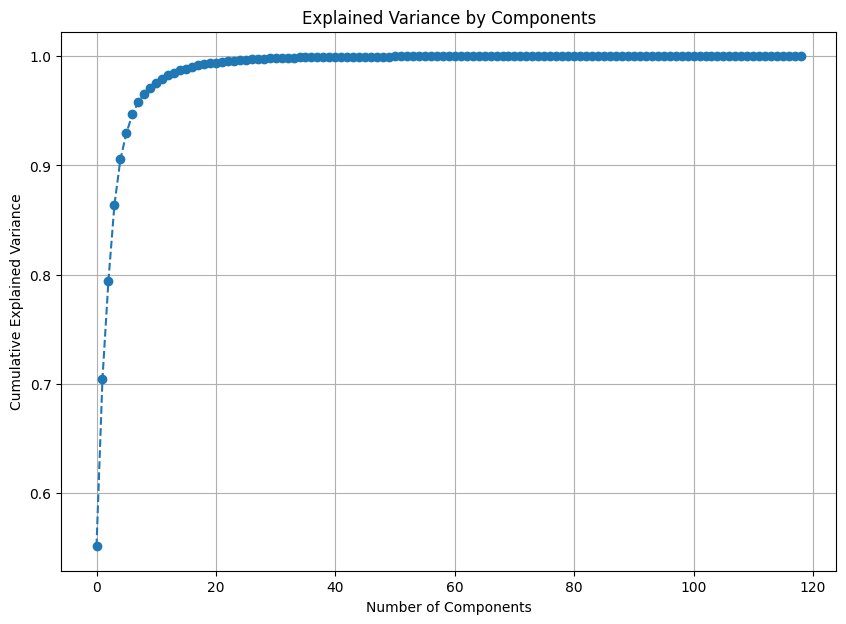

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.drop(columns = ['Image' , 'class'])
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plotting the variance explained by each principal component
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=55)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9503649635036496


In [ ]:
#kmeans_before_dataset
#2
#code end1
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)

df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined_bef.csv')
df_combined3

#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/dataset/green_only_rmvd_dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()

# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)

df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

df=pd.concat([df_combined3,df_final],axis=1)
df.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Folder                                              Image  R_contrast_0  \
0      0  /content/drive/MyDrive/dataset/green_only_rmvd...    757.192325   
1      0  /content/drive/MyDrive/dataset/green_only_rmvd...    460.207812   
2      0  /content/drive/MyDrive/dataset/green_only_rmvd...    518.256403   
3      0  /content/drive/MyDrive/dataset/green_only_rmvd...    415.153922   
4      0  /content/drive/MyDrive/dataset/green_only_rmvd...    494.661183   

   R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0         0.457927    0.253580         0.913074  54.853851   
1         0.687984    0.435051         0.956641  64.091324   
2         0.646183    0.389261         0.950373  63.420212   
3         0.765144    0.538786         0.961623  90.331955   
4         0.677822    0.430112         0.954399  67.679489   

   R_Standard Deviation  R_Entropy     R_RMS  ...  Bl_correlation_0  \
0             66.095789   4.614365  8.035603  ...          0.615803   
1             72.903961   3.385643  7.670066  ...          0.869488   
2             72.321587   3.618824  7.700453  ...          0.855249   
3             73.506129   2.852899  8.619187  ...          0.913652   
4             73.696302   3.373878  7.792595  ...          0.868137   

      Bl_Mean  Bl_Standard Deviation  Bl_Entropy     Bl_RMS   Bl_Variance  \
0  130.220657              89.924193    6.023554  10.381345   8086.360536   
1  116.077499             104.546492    3.808123  10.141276  10929.968985   
2  118.044174             101.915392    4.175175  10.171108  10386.747026   
3  146.617050             101.929468    3.149385  11.532905  10389.616457   
4  121.840790             103.221092    3.976181  10.343442  10654.593884   

   Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0       0.999876    -1.532096    -0.185734  0.404758  
1       0.999909    -1.838241    -0.010988  0.718723  
2       0.999904    -1.796585    -0.032600  0.677141  
3       0.999904    -1.533610    -0.570498  0.792674  
4       0.999906    -1.809172    -0.106043  0.692282  

[5 rows x 119 columns]

In [ ]:
#kmeans_before_dataset
#2
#code end1
#end222
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)

df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined_bef.csv')
df_combined3

#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()

# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)

df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

df=pd.concat([df_combined3,df_final],axis=1)
df.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

FileNotFoundError: [Errno 2] No such file or directory: 'content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g'

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/green_only_rmvd.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/green_only_rmvd.csv')

In [ ]:
df=df.drop(['Unnamed: 0','Folder'],axis=1)
df

Image  R_contrast_0  \
0     /content/drive/MyDrive/dataset/green_only_rmvd...    757.192325   
1     /content/drive/MyDrive/dataset/green_only_rmvd...    460.207812   
2     /content/drive/MyDrive/dataset/green_only_rmvd...    518.256403   
3     /content/drive/MyDrive/dataset/green_only_rmvd...    415.153922   
4     /content/drive/MyDrive/dataset/green_only_rmvd...    494.661183   
...                                                 ...           ...   
3418  /content/drive/MyDrive/dataset/green_only_rmvd...    466.732169   
3419  /content/drive/MyDrive/dataset/green_only_rmvd...    428.755714   
3420  /content/drive/MyDrive/dataset/green_only_rmvd...    614.142678   
3421  /content/drive/MyDrive/dataset/green_only_rmvd...    649.959544   
3422  /content/drive/MyDrive/dataset/green_only_rmvd...    551.567509   

      R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0            0.457927    0.253580         0.913074  54.853851   
1            0.687984    0.435051         0.956641  64.091324   
2            0.646183    0.389261         0.950373  63.420212   
3            0.765144    0.538786         0.961623  90.331955   
4            0.677822    0.430112         0.954399  67.679489   
...               ...         ...              ...        ...   
3418         0.683926    0.454696         0.957534  78.176437   
3419         0.730204    0.468349         0.958704  57.137283   
3420         0.606118    0.366744         0.931699  46.645126   
3421         0.575261    0.374436         0.914245  37.836777   
3422         0.643275    0.437113         0.929050  37.423737   

      R_Standard Deviation  R_Entropy     R_RMS   R_Variance  ...  \
0                66.095789   4.614365  8.035603  4368.653262  ...   
1                72.903961   3.385643  7.670066  5314.987586  ...   
2                72.321587   3.618824  7.700453  5230.411999  ...   
3                73.506129   2.852899  8.619187  5403.150960  ...   
4                73.696302   3.373878  7.792595  5431.144877  ...   
...                    ...        ...       ...          ...  ...   
3418             74.134477   3.308252  8.266999  5495.920728  ...   
3419             72.133683   3.116972  7.107150  5203.268217  ...   
3420             67.171089   3.700489  6.894029  4511.955135  ...   
3421             61.670176   3.681518  6.540760  3803.210648  ...   
3422             62.483801   3.355192  6.299162  3904.225416  ...   

      Bl_correlation_0     Bl_Mean  Bl_Standard Deviation  Bl_Entropy  \
0             0.615803  130.220657              89.924193    6.023554   
1             0.869488  116.077499             104.546492    3.808123   
2             0.855249  118.044174             101.915392    4.175175   
3             0.913652  146.617050             101.929468    3.149385   
4             0.868137  121.840790             103.221092    3.976181   
...                ...         ...                    ...         ...   
3418          0.878175  137.544006              98.959844    3.955604   
3419          0.914172   99.087250             104.230429    3.486736   
3420          0.858038   89.020599              97.470391    4.044630   
3421          0.780199   90.105530              93.739997    4.787760   
3422          0.843717   75.294769              96.079974    3.614934   

         Bl_RMS   Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness  \
0     10.381345   8086.360536       0.999876    -1.532096    -0.185734   
1     10.141276  10929.968985       0.999909    -1.838241    -0.010988   
2     10.171108  10386.747026       0.999904    -1.796585    -0.032600   
3     11.532905  10389.616457       0.999904    -1.533610    -0.570498   
4     10.343442  10654.593884       0.999906    -1.809172    -0.106043   
...         ...           ...            ...          ...          ...   
3418  11.000981   9793.050706       0.999898    -1.660604    -0.350048   
3419   9.404736  10863.982408       0.999908    -1.767499     0.292061   
3420   9.111921   95

In [ ]:
def classify_name(name):
    if 'Rot' in name:
        return 'Rot'
    elif 'Msls' in name:
        return 'Msls'
    elif 'HL' in name:
        return 'HL'
    elif 'Blight' in name:
        return 'Blight'
    else:
        return 'Unknown'

# Apply the function to the 'Image' column and create a new 'class' column
df['class'] = df['Image'].apply(classify_name)

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/green_only_rmvd_img_class.csv')

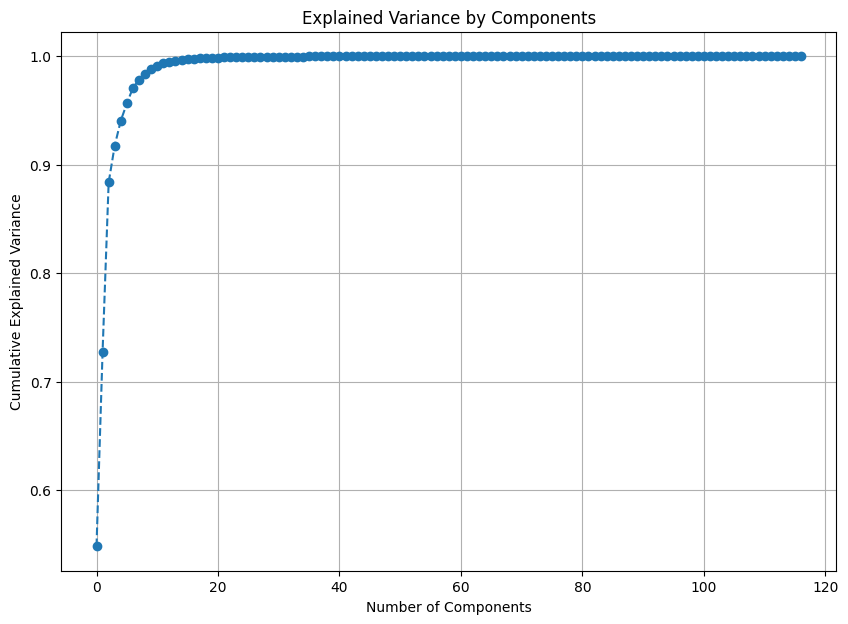

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.drop(columns = ['Image' , 'class'])
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plotting the variance explained by each principal component
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame
data=data[:1000]
# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=30, n_features_to_keep=31)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


In [ ]:
#kmeans_before_dataset
#2
#code end2
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)

df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined_bef.csv')
df_combined3

#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/dataset']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()

# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)

df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

df=pd.concat([df_combined3,df_final],axis=1)
df.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Folder                                              Image  R_contrast_0  \
0      0  /content/drive/MyDrive/Grape Plant from Plant ...    236.877528   
1      0  /content/drive/MyDrive/Grape Plant from Plant ...    376.072687   
2      0  /content/drive/MyDrive/Grape Plant from Plant ...    484.932062   
3      0  /content/drive/MyDrive/Grape Plant from Plant ...    888.333808   
4      0  /content/drive/MyDrive/Grape Plant from Plant ...    740.480683   

   R_homogeneity_0  R_energy_0  R_correlation_0      R_Mean  \
0         0.145476    0.016712         0.918734  107.229660   
1         0.116875    0.012145         0.926797  117.717728   
2         0.113506    0.013975         0.794565  120.240372   
3         0.097926    0.011224         0.856196  113.347076   
4         0.077176    0.010101         0.850961  131.855759   

   R_Standard Deviation  R_Entropy      R_RMS  ...  Bl_correlation_0  \
0             38.194418   7.088197  10.260374  ...          0.494546   
1             50.737014   7.556110  10.285619  ...          0.441065   
2             34.346895   7.073486  10.144999  ...          0.258046   
3             55.627951   7.682240  10.442613  ...          0.223696   
4             49.823582   7.501385  10.272191  ...          0.108824   

      Bl_Mean  Bl_Standard Deviation  Bl_Entropy     Bl_RMS  Bl_Variance  \
0  126.615463              82.658254    7.363986   9.841481  6832.387028   
1  113.454330              81.927735    7.653443   9.805919  6712.153768   
2  134.210037              77.637253    7.876147  10.115067  6027.542997   
3  127.436981              75.472135    7.945894  10.131594  5696.043148   
4  135.699936              68.388490    7.941644  10.267380  4676.985538   

   Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0       0.999854    -1.340568    -0.168936  0.263105  
1       0.999851    -1.461786     0.046183  0.190058  
2       0.999834    -1.269794    -0.143475  0.109219  
3       0.999824    -1.210468    -0.007715  0.077276  
4       0.999786    -0.927435    -0.230718  0.039771  

[5 rows x 119 columns]

In [ ]:
#kmeans_before_dataset
#2
#code end2
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfr = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['R'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['R']] + [f"{color}_Standard Deviation" for color in ['R']] + [f"{color}_Entropy" for color in ['R']] + [f"{color}_RMS" for color in ['R']] + [f"{color}_Variance" for color in ['R']] + [f"{color}_Smoothness" for color in ['R']] + [f"{color}_Kurtosis" for color in ['R']] + [f"{color}_Skewness" for color in ['R']] + [f"{color}_IDM" for color in ['R']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 0])  # Red channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"R_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['R_Mean'] = np.mean(channel_image)
        row_data['R_Standard Deviation'] = np.std(channel_image)
        row_data['R_Entropy'] = shannon_entropy(channel_image)
        row_data['R_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['R_Variance'] = np.var(channel_image)
        row_data['R_Smoothness'] = 1 - 1/(1 + row_data['R_Variance'])
        row_data['R_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['R_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['R_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfr = dfr.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfg = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['G'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['G']] + [f"{color}_Standard Deviation" for color in ['G']] + [f"{color}_Entropy" for color in ['G']] + [f"{color}_RMS" for color in ['G']] + [f"{color}_Variance" for color in ['G']] + [f"{color}_Smoothness" for color in ['G']] + [f"{color}_Kurtosis" for color in ['G']] + [f"{color}_Skewness" for color in ['G']] + [f"{color}_IDM" for color in ['G']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 1])  # Green channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"G_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['G_Mean'] = np.mean(channel_image)
        row_data['G_Standard Deviation'] = np.std(channel_image)
        row_data['G_Entropy'] = shannon_entropy(channel_image)
        row_data['G_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['G_Variance'] = np.var(channel_image)
        row_data['G_Smoothness'] = 1 - 1/(1 + row_data['G_Variance'])
        row_data['G_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['G_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['G_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfg = dfg.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfb = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['B'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['B']] + [f"{color}_Standard Deviation" for color in ['B']] + [f"{color}_Entropy" for color in ['B']] + [f"{color}_RMS" for color in ['B']] + [f"{color}_Variance" for color in ['B']] + [f"{color}_Smoothness" for color in ['B']] + [f"{color}_Kurtosis" for color in ['B']] + [f"{color}_Skewness" for color in ['B']] + [f"{color}_IDM" for color in ['B']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        channel_image = img_as_ubyte(image[:, :, 2])  # Blue channel
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"B_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['B_Mean'] = np.mean(channel_image)
        row_data['B_Standard Deviation'] = np.std(channel_image)
        row_data['B_Entropy'] = shannon_entropy(channel_image)
        row_data['B_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['B_Variance'] = np.var(channel_image)
        row_data['B_Smoothness'] = 1 - 1/(1 + row_data['B_Variance'])
        row_data['B_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['B_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['B_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfb = dfb.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfh = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['H'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['H']] + [f"{color}_Standard Deviation" for color in ['H']] + [f"{color}_Entropy" for color in ['H']] + [f"{color}_RMS" for color in ['H']] + [f"{color}_Variance" for color in ['H']] + [f"{color}_Smoothness" for color in ['H']] + [f"{color}_Kurtosis" for color in ['H']] + [f"{color}_Skewness" for color in ['H']] + [f"{color}_IDM" for color in ['H']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 0]  # H channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"H_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['H_Mean'] = np.mean(channel_image)
        row_data['H_Standard Deviation'] = np.std(channel_image)
        row_data['H_Entropy'] = shannon_entropy(channel_image)
        row_data['H_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['H_Variance'] = np.var(channel_image)
        row_data['H_Smoothness'] = 1 - 1/(1 + row_data['H_Variance'])
        row_data['H_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['H_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['H_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfh = dfh.append(row_data, ignore_index=True)




from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfs = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['S'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['S']] + [f"{color}_Standard Deviation" for color in ['S']] + [f"{color}_Entropy" for color in ['S']] + [f"{color}_RMS" for color in ['S']] + [f"{color}_Variance" for color in ['S']] + [f"{color}_Smoothness" for color in ['S']] + [f"{color}_Kurtosis" for color in ['S']] + [f"{color}_Skewness" for color in ['S']] + [f"{color}_IDM" for color in ['S']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 1]  # S channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"S_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['S_Mean'] = np.mean(channel_image)
        row_data['S_Standard Deviation'] = np.std(channel_image)
        row_data['S_Entropy'] = shannon_entropy(channel_image)
        row_data['S_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['S_Variance'] = np.var(channel_image)
        row_data['S_Smoothness'] = 1 - 1/(1 + row_data['S_Variance'])
        row_data['S_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['S_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['S_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfs = dfs.append(row_data, ignore_index=True)



from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfv = pd.DataFrame(columns=['Folder', 'Image'] + [f"{color}_{prop}_{angle}" for color in ['V'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['V']] + [f"{color}_Standard Deviation" for color in ['V']] + [f"{color}_Entropy" for color in ['V']] + [f"{color}_RMS" for color in ['V']] + [f"{color}_Variance" for color in ['V']] + [f"{color}_Smoothness" for color in ['V']] + [f"{color}_Kurtosis" for color in ['V']] + [f"{color}_Skewness" for color in ['V']] + [f"{color}_IDM" for color in ['V']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)][:num_images_per_folder]
    for image_path in image_paths:
        image = io.imread(image_path)
        hsv_image = color.rgb2hsv(image)
        channel_image = hsv_image[:, :, 2]  # V channel
        channel_image = (channel_image * 255).astype(np.uint8)  # Scale to [0, 255] and convert to 8-bit unsigned integer
        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1
        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)
        row_data = {'Folder': folder_index, 'Image': image_path}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"V_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value
        # Calculate the features
        row_data['V_Mean'] = np.mean(channel_image)
        row_data['V_Standard Deviation'] = np.std(channel_image)
        row_data['V_Entropy'] = shannon_entropy(channel_image)
        row_data['V_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['V_Variance'] = np.var(channel_image)
        row_data['V_Smoothness'] = 1 - 1/(1 + row_data['V_Variance'])
        row_data['V_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['V_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['V_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]
        dfv = dfv.append(row_data, ignore_index=True)



# Drop the first two columns of dfg and dfb
dfg = dfg.iloc[:, 2:]
dfb = dfb.iloc[:, 2:]

# Now concatenate
df_combined = pd.concat([dfr, dfg, dfb], axis=1)
# Drop the first two columns of dfg and dfb
dfs = dfs.iloc[:, 2:]
dfv = dfv.iloc[:, 2:]

# Now concatenate
df_combined1 = pd.concat([dfh, dfs, dfv], axis=1)

df_combined1 = df_combined1.iloc[:, 2:]

# Now concatenate
df_combined3 = pd.concat([df_combined,df_combined1], axis=1)

df_combined3.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/combined_bef.csv')
df_combined3

#13
#arambam
from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame
dfl2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['L'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['L']] + [f"{color}_Standard Deviation" for color in ['L']] + [f"{color}_Entropy" for color in ['L']] + [f"{color}_RMS" for color in ['L']] + [f"{color}_Variance" for color in ['L']] + [f"{color}_Smoothness" for color in ['L']] + [f"{color}_Kurtosis" for color in ['L']] + [f"{color}_Skewness" for color in ['L']] + [f"{color}_IDM" for color in ['L']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 0]  # L channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"L_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['L_Mean'] = np.mean(channel_image)
        row_data['L_Standard Deviation'] = np.std(channel_image)
        row_data['L_Entropy'] = shannon_entropy(channel_image)
        row_data['L_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['L_Variance'] = np.var(channel_image)
        row_data['L_Smoothness'] = 1 - 1/(1 + row_data['L_Variance'])
        row_data['L_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['L_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['L_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfl2 = dfl2.append(row_data, ignore_index=True)
#df = pd.concat([df , dfl2] , axis=1)
dfl2.head()

from skimage import io, color
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_ubyte
import numpy as np
import os
import pandas as pd
from scipy.stats import kurtosis, skew
from skimage.measure import shannon_entropy

# Directories where your images are stored
image_dirs = ['/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_ori']

# Number of images to process from each folder
num_images_per_folder = 4393 #len(os.listdir(image_dirs[0]))

# Compute GLCM properties for each angle
properties = ['contrast', 'homogeneity', 'energy', 'correlation']
angles = [0]

# Initialize an empty DataFrame for "a" channel
dfa2 = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['a'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['a']] + [f"{color}_Standard Deviation" for color in ['a']] + [f"{color}_Entropy" for color in ['a']] + [f"{color}_RMS" for color in ['a']] + [f"{color}_Variance" for color in ['a']] + [f"{color}_Smoothness" for color in ['a']] + [f"{color}_Kurtosis" for color in ['a']] + [f"{color}_Skewness" for color in ['a']] + [f"{color}_IDM" for color in ['a']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 1]  # "a" channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"a_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['a_Mean'] = np.mean(channel_image)
        row_data['a_Standard Deviation'] = np.std(channel_image)
        row_data['a_Entropy'] = shannon_entropy(channel_image)
        row_data['a_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['a_Variance'] = np.var(channel_image)
        row_data['a_Smoothness'] = 1 - 1/(1 + row_data['a_Variance'])
        row_data['a_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['a_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['a_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfa2 = dfa2.append(row_data, ignore_index=True)


dfa2.head()

# Initialize an empty DataFrame for 'b' channel
dfb = pd.DataFrame(columns=[f"{color}_{prop}_{angle}" for color in ['Bl'] for prop in properties for angle in angles] + [f"{color}_Mean" for color in ['Bl']] + [f"{color}_Standard Deviation" for color in ['Bl']] + [f"{color}_Entropy" for color in ['Bl']] + [f"{color}_RMS" for color in ['Bl']] + [f"{color}_Variance" for color in ['Bl']] + [f"{color}_Smoothness" for color in ['Bl']] + [f"{color}_Kurtosis" for color in ['Bl']] + [f"{color}_Skewness" for color in ['Bl']] + [f"{color}_IDM" for color in ['Bl']])

for folder_index, image_dir in enumerate(image_dirs):
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
    for image_path in image_paths:
        image = io.imread(image_path)
        lab_image = color.rgb2lab(image)
        channel_image = lab_image[:, :, 2]  # 'b' channel
        channel_image =(channel_image * 255).astype(np.uint8) #img_as_ubyte(channel_image)   # Scale to [0, 255] and convert to 8-bit unsigned integer

        # If all pixels are zero, change one pixel to 1
        if np.count_nonzero(channel_image) == 0:
            channel_image[0, 0] = 1

        glcm = greycomatrix(channel_image, distances=[1], angles=angles, levels=256, symmetric=True, normed=True)

        row_data = {}
        for prop in properties:
            for i, angle in enumerate(angles):
                key = f"Bl_{prop}_{angle}"
                value = greycoprops(glcm, prop)[0, i]
                row_data[key] = value

        # Calculate the features
        row_data['Bl_Mean'] = np.mean(channel_image)
        row_data['Bl_Standard Deviation'] = np.std(channel_image)
        row_data['Bl_Entropy'] = shannon_entropy(channel_image)
        row_data['Bl_RMS'] = np.sqrt(np.mean(channel_image**2))
        row_data['Bl_Variance'] = np.var(channel_image)
        row_data['Bl_Smoothness'] = 1 - 1/(1 + row_data['Bl_Variance'])
        row_data['Bl_Kurtosis'] = kurtosis(np.ndarray.flatten(channel_image))
        row_data['Bl_Skewness'] = skew(np.ndarray.flatten(channel_image))
        row_data['Bl_IDM'] = greycoprops(greycomatrix(channel_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True), 'homogeneity')[0, 0]

        dfb = dfb.append(row_data, ignore_index=True)

df_final=pd.concat([dfl2,dfa2,dfb],axis=1)
df_final

df=pd.concat([df_combined3,df_final],axis=1)
df.head()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Folder                                              Image  R_contrast_0  \
0      0  /content/drive/MyDrive/Grape Plant from Plant ...    602.958946   
1      0  /content/drive/MyDrive/Grape Plant from Plant ...    778.271094   
2      0  /content/drive/MyDrive/Grape Plant from Plant ...    797.771262   
3      0  /content/drive/MyDrive/Grape Plant from Plant ...    691.767479   
4      0  /content/drive/MyDrive/Grape Plant from Plant ...    866.642402   

   R_homogeneity_0  R_energy_0  R_correlation_0      R_Mean  \
0         0.404532    0.318065         0.965734  150.283142   
1         0.515270    0.453372         0.955746  172.483551   
2         0.555301    0.494868         0.953731  180.220459   
3         0.409651    0.330243         0.960805  151.484955   
4         0.456509    0.385703         0.952043  162.103256   

   R_Standard Deviation  R_Entropy     R_RMS  ...  Bl_correlation_0  \
0             93.803960   5.962537  7.951181  ...          0.542569   
1             93.789258   4.998133  7.037868  ...          0.606322   
2             92.798852   4.655009  6.678564  ...          0.622494   
3             93.960286   5.887563  7.859878  ...          0.554790   
4             95.052701   5.458044  7.424967  ...          0.581175   

     Bl_Mean  Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  \
0  75.048370              84.760437    5.767127  7.839434  7184.331645   
1  60.800110              81.876031    4.861060  7.076167  6703.684409   
2  57.454849              81.148966    4.577041  6.880363  6585.154700   
3  74.263290              84.462474    5.712186  7.789996  7133.909453   
4  68.124176              83.799446    5.295317  7.443310  7022.347160   

   Bl_Smoothness  Bl_Kurtosis  Bl_Skewness    Bl_IDM  
0       0.999861    -0.999653     0.707494  0.419892  
1       0.999851    -0.437836     1.033649  0.532188  
2       0.999848    -0.230133     1.130133  0.566212  
3       0.999860    -0.971891     0.723888  0.428272  
4       0.999858    -0.776217     0.856895  0.479148  

[5 rows x 119 columns]

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/original1.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/green_only_rmvd.csv')

In [ ]:
df=df.drop(['Unnamed: 0','Folder'],axis=1)
df

Image  R_contrast_0  \
0     /content/drive/MyDrive/dataset/green_only_rmvd...    757.192325   
1     /content/drive/MyDrive/dataset/green_only_rmvd...    460.207812   
2     /content/drive/MyDrive/dataset/green_only_rmvd...    518.256403   
3     /content/drive/MyDrive/dataset/green_only_rmvd...    415.153922   
4     /content/drive/MyDrive/dataset/green_only_rmvd...    494.661183   
...                                                 ...           ...   
3418  /content/drive/MyDrive/dataset/green_only_rmvd...    466.732169   
3419  /content/drive/MyDrive/dataset/green_only_rmvd...    428.755714   
3420  /content/drive/MyDrive/dataset/green_only_rmvd...    614.142678   
3421  /content/drive/MyDrive/dataset/green_only_rmvd...    649.959544   
3422  /content/drive/MyDrive/dataset/green_only_rmvd...    551.567509   

      R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0            0.457927    0.253580         0.913074  54.853851   
1            0.687984    0.435051         0.956641  64.091324   
2            0.646183    0.389261         0.950373  63.420212   
3            0.765144    0.538786         0.961623  90.331955   
4            0.677822    0.430112         0.954399  67.679489   
...               ...         ...              ...        ...   
3418         0.683926    0.454696         0.957534  78.176437   
3419         0.730204    0.468349         0.958704  57.137283   
3420         0.606118    0.366744         0.931699  46.645126   
3421         0.575261    0.374436         0.914245  37.836777   
3422         0.643275    0.437113         0.929050  37.423737   

      R_Standard Deviation  R_Entropy     R_RMS   R_Variance  ...  \
0                66.095789   4.614365  8.035603  4368.653262  ...   
1                72.903961   3.385643  7.670066  5314.987586  ...   
2                72.321587   3.618824  7.700453  5230.411999  ...   
3                73.506129   2.852899  8.619187  5403.150960  ...   
4                73.696302   3.373878  7.792595  5431.144877  ...   
...                    ...        ...       ...          ...  ...   
3418             74.134477   3.308252  8.266999  5495.920728  ...   
3419             72.133683   3.116972  7.107150  5203.268217  ...   
3420             67.171089   3.700489  6.894029  4511.955135  ...   
3421             61.670176   3.681518  6.540760  3803.210648  ...   
3422             62.483801   3.355192  6.299162  3904.225416  ...   

      Bl_correlation_0     Bl_Mean  Bl_Standard Deviation  Bl_Entropy  \
0             0.615803  130.220657              89.924193    6.023554   
1             0.869488  116.077499             104.546492    3.808123   
2             0.855249  118.044174             101.915392    4.175175   
3             0.913652  146.617050             101.929468    3.149385   
4             0.868137  121.840790             103.221092    3.976181   
...                ...         ...                    ...         ...   
3418          0.878175  137.544006              98.959844    3.955604   
3419          0.914172   99.087250             104.230429    3.486736   
3420          0.858038   89.020599              97.470391    4.044630   
3421          0.780199   90.105530              93.739997    4.787760   
3422          0.843717   75.294769              96.079974    3.614934   

         Bl_RMS   Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness  \
0     10.381345   8086.360536       0.999876    -1.532096    -0.185734   
1     10.141276  10929.968985       0.999909    -1.838241    -0.010988   
2     10.171108  10386.747026       0.999904    -1.796585    -0.032600   
3     11.532905  10389.616457       0.999904    -1.533610    -0.570498   
4     10.343442  10654.593884       0.999906    -1.809172    -0.106043   
...         ...           ...            ...          ...          ...   
3418  11.000981   9793.050706       0.999898    -1.660604    -0.350048   
3419   9.404736  10863.982408       0.999908    -1.767499     0.292061   
3420   9.111921   95

In [ ]:
def classify_name(name):
    if 'Rot' in name:
        return 'Rot'
    elif 'Msls' in name:
        return 'Msls'
    elif 'HL' in name:
        return 'HL'
    elif 'Blight' in name:
        return 'Blight'
    else:
        return 'Unknown'

# Apply the function to the 'Image' column and create a new 'class' column
df['class'] = df['Image'].apply(classify_name)

In [ ]:
df.to_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/original_img1_class.csv')

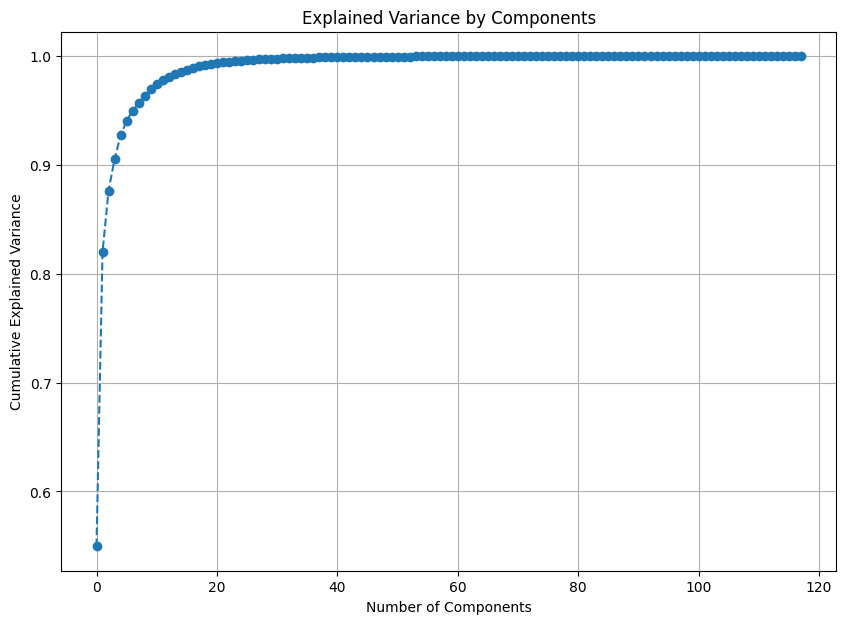

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.drop(columns = ['Image' , 'class'])
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Plotting the variance explained by each principal component
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/original_img1_class.csv')

In [ ]:
df.head()

Unnamed: 0  Folder                                              Image  \
0           0       0  /content/drive/MyDrive/Grape Plant from Plant ...   
1           1       0  /content/drive/MyDrive/Grape Plant from Plant ...   
2           2       0  /content/drive/MyDrive/Grape Plant from Plant ...   
3           3       0  /content/drive/MyDrive/Grape Plant from Plant ...   
4           4       0  /content/drive/MyDrive/Grape Plant from Plant ...   

   R_contrast_0  R_homogeneity_0  R_energy_0  R_correlation_0      R_Mean  \
0    602.958946         0.404532    0.318065         0.965734  150.283142   
1    778.271094         0.515270    0.453372         0.955746  172.483551   
2    797.771262         0.555301    0.494868         0.953731  180.220459   
3    691.767479         0.409651    0.330243         0.960805  151.484955   
4    866.642402         0.456509    0.385703         0.952043  162.103256   

   R_Standard Deviation  R_Entropy  ...    Bl_Mean  Bl_Standard Deviation  \
0             93.803960   5.962537  ...  75.048370              84.760437   
1             93.789258   4.998133  ...  60.800110              81.876031   
2             92.798852   4.655009  ...  57.454849              81.148966   
3             93.960286   5.887563  ...  74.263290              84.462474   
4             95.052701   5.458044  ...  68.124176              83.799446   

   Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  Bl_Kurtosis  Bl_Skewness  \
0    5.767127  7.839434  7184.331645       0.999861    -0.999653     0.707494   
1    4.861060  7.076167  6703.684409       0.999851    -0.437836     1.033649   
2    4.577041  6.880363  6585.154700       0.999848    -0.230133     1.130133   
3    5.712186  7.789996  7133.909453       0.999860    -0.971891     0.723888   
4    5.295317  7.443310  7022.347160       0.999858    -0.776217     0.856895   

     Bl_IDM  class  
0  0.419892   Msls  
1  0.532188   Msls  
2  0.566212   Msls  
3  0.428272   Msls  
4  0.479148   Msls  

[5 rows x 121 columns]

In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=22)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9763593380614657


In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=22)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9799054373522459


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/all_removed_img_class.csv')
df.head()

Unnamed: 0                                              Image  \
0           0  /content/drive/MyDrive/Grape Plant from Plant ...   
1           1  /content/drive/MyDrive/Grape Plant from Plant ...   
2           2  /content/drive/MyDrive/Grape Plant from Plant ...   
3           3  /content/drive/MyDrive/Grape Plant from Plant ...   
4           4  /content/drive/MyDrive/Grape Plant from Plant ...   

   R_contrast_0  R_homogeneity_0  R_energy_0  R_correlation_0    R_Mean  \
0     62.763664         0.904144    0.849878         0.939948  4.664062   
1     60.069041         0.900356    0.849656         0.960272  6.554169   
2     89.073820         0.900551    0.867483         0.932775  5.672668   
3     67.871952         0.898121    0.831010         0.946538  5.613297   
4     59.727037         0.918485    0.884514         0.943024  4.269379   

   R_Standard Deviation  R_Entropy     R_RMS  ...    Bl_Mean  \
0             22.817283   1.289239  2.614382  ...  17.396439   
1             27.453210   1.396968  2.849603  ...  17.990738   
2             25.691265   1.239135  2.672480  ...  15.887192   
3             25.147812   1.448733  2.803401  ...  19.113434   
4             22.850870   1.047213  2.371547  ...  14.565430   

   Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  \
0              47.865462    1.684455  3.906154  2291.102434       0.999564   
1              48.920453    1.745613  3.880841  2393.210684       0.999582   
2              46.131088    1.591456  3.658209  2128.077286       0.999530   
3              50.208632    1.821821  4.080676  2520.906688       0.999603   
4              43.909834    1.452035  3.603206  1928.073539       0.999482   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM  class  
0     8.762388     3.045275  0.869165    Rot  
1     8.251358     2.972850  0.864459    Rot  
2     9.889289     3.212987  0.869556    Rot  
3     7.528916     2.861715  0.855452    Rot  
4    11.039150     3.363525  0.886193    Rot  

[5 rows x 120 columns]

In [ ]:
df = df.drop(columns = ['Unnamed: 0'] , axis=1)
!pip install ReliefF

In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=20)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9931740614334471


In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=20)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1 , 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9897610921501706


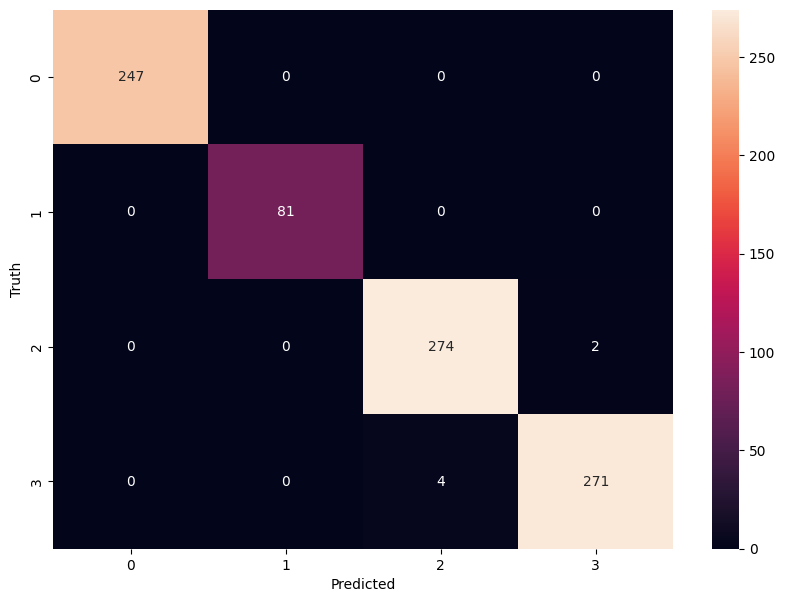

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/kbefore_img_class.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

Image  R_contrast_0  \
0  /content/drive/MyDrive/dataset/kmeans_before_d...    313.702711   
1  /content/drive/MyDrive/dataset/kmeans_before_d...    308.861612   
2  /content/drive/MyDrive/dataset/kmeans_before_d...    314.751072   
3  /content/drive/MyDrive/dataset/kmeans_before_d...    277.369930   
4  /content/drive/MyDrive/dataset/kmeans_before_d...    363.704504   

   R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0         0.443201    0.384427         0.942622  51.655396   
1         0.499264    0.441771         0.970626  63.052795   
2         0.476578    0.420997         0.971558  70.782959   
3         0.419132    0.352737         0.952174  56.910767   
4         0.469998    0.419652         0.964992  70.268768   

   R_Standard Deviation  R_Entropy     R_RMS   R_Variance  ...    Bl_Mean  \
0             52.281805   5.235270  7.708495  2733.387107  ...  79.125580   
1             72.473631   5.098065  7.351668  5252.427175  ...  72.337585   
2             74.372085   5.113388  7.445683  5531.207013  ...  76.074844   
3             53.858629   5.435494  7.859691  2900.751895  ...  83.333572   
4             72.067193   5.110090  7.414435  5193.680297  ...  74.937180   

   Bl_Standard Deviation  Bl_Entropy    Bl_RMS  Bl_Variance  Bl_Smoothness  \
0              82.943166    6.016643  8.197303  6879.568855       0.999855   
1              82.129109    5.587558  7.796908  6745.190510       0.999852   
2              83.262773    5.757623  7.985886  6932.689299       0.999856   
3              83.678749    6.193439  8.335733  7002.132977       0.999857   
4              82.593554    5.755126  7.967140  6821.695227       0.999853   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM   class  
0    -1.016484     0.625565  0.374751  Blight  
1    -0.857916     0.749136  0.430211  Blight  
2    -0.971536     0.677326  0.409629  Blight  
3    -1.110278     0.547468  0.355761  Blight  
4    -0.918500     0.705588  0.407694  Blight  

[5 rows x 119 columns]

Accuracy: 0.9416058394160584


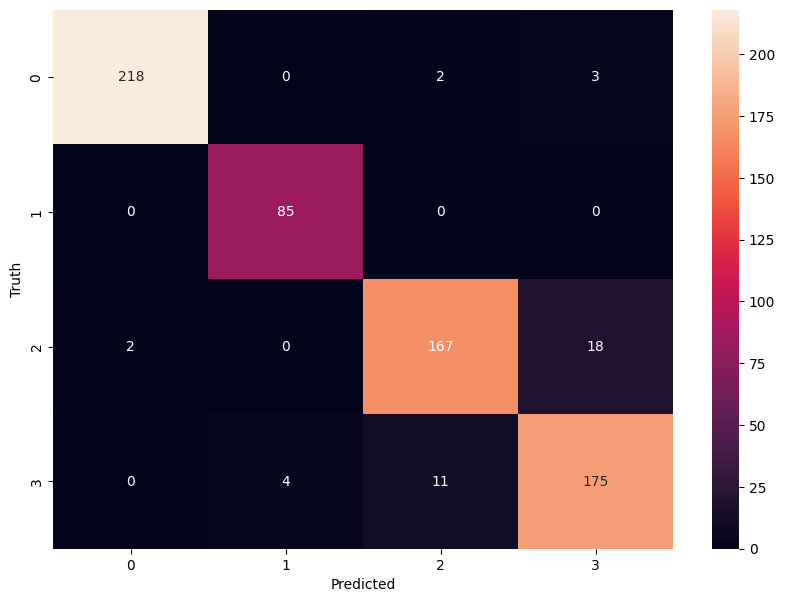

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=20)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("Best Parameters:", grid_search.best_params_)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Grape Plant from Plant Village Dataset/green_only_rmvd_img_class.csv')
df = df.drop(['Unnamed: 0'] , axis =1 )
df.head()

Image  R_contrast_0  \
0  /content/drive/MyDrive/dataset/green_only_rmvd...    757.192325   
1  /content/drive/MyDrive/dataset/green_only_rmvd...    460.207812   
2  /content/drive/MyDrive/dataset/green_only_rmvd...    518.256403   
3  /content/drive/MyDrive/dataset/green_only_rmvd...    415.153922   
4  /content/drive/MyDrive/dataset/green_only_rmvd...    494.661183   

   R_homogeneity_0  R_energy_0  R_correlation_0     R_Mean  \
0         0.457927    0.253580         0.913074  54.853851   
1         0.687984    0.435051         0.956641  64.091324   
2         0.646183    0.389261         0.950373  63.420212   
3         0.765144    0.538786         0.961623  90.331955   
4         0.677822    0.430112         0.954399  67.679489   

   R_Standard Deviation  R_Entropy     R_RMS   R_Variance  ...     Bl_Mean  \
0             66.095789   4.614365  8.035603  4368.653262  ...  130.220657   
1             72.903961   3.385643  7.670066  5314.987586  ...  116.077499   
2             72.321587   3.618824  7.700453  5230.411999  ...  118.044174   
3             73.506129   2.852899  8.619187  5403.150960  ...  146.617050   
4             73.696302   3.373878  7.792595  5431.144877  ...  121.840790   

   Bl_Standard Deviation  Bl_Entropy     Bl_RMS   Bl_Variance  Bl_Smoothness  \
0              89.924193    6.023554  10.381345   8086.360536       0.999876   
1             104.546492    3.808123  10.141276  10929.968985       0.999909   
2             101.915392    4.175175  10.171108  10386.747026       0.999904   
3             101.929468    3.149385  11.532905  10389.616457       0.999904   
4             103.221092    3.976181  10.343442  10654.593884       0.999906   

   Bl_Kurtosis  Bl_Skewness    Bl_IDM  class  
0    -1.532096    -0.185734  0.404758    Rot  
1    -1.838241    -0.010988  0.718723    Rot  
2    -1.796585    -0.032600  0.677141    Rot  
3    -1.533610    -0.570498  0.792674    Rot  
4    -1.809172    -0.106043  0.692282    Rot  

[5 rows x 119 columns]

In [ ]:
from ReliefF import ReliefF
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data from CSV
data = df.drop('Image', axis=1)  # Assuming 'df' is your DataFrame

# Extract features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Apply ReliefF algorithm
fs = ReliefF(n_neighbors=20, n_features_to_keep=20)
X_selected = fs.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Train the SVM classifier with best parameters
svm_classifier = SVC(**best_params)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8306569343065694


NameError: name 'confusion_matrix' is not defined

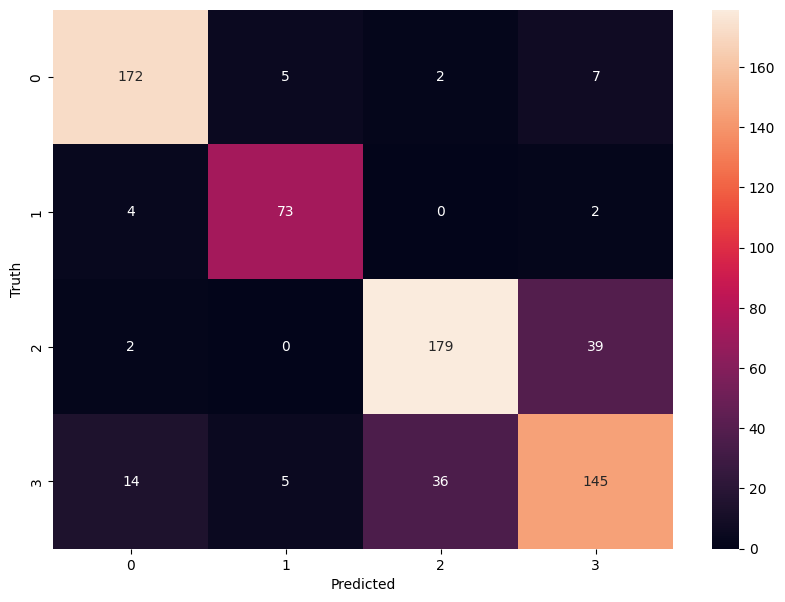

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


In [ ]:
from PIL import Image
image_dir='/content/drive/MyDrive/Grape Plant from Plant Village Dataset/final_no_g'
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
for img in os.listdir(image_dir):
    try:
        im = Image.open(os.path.join(image_dir, img))  # Try to open the image
        im.verify()  # Verify that it is, in fact an image
        image_paths.append(os.path.join(image_dir, img))
    except (IOError, SyntaxError) as e:
        print('Bad file:', img)  # Print out the names of corrupt files

image_paths = image_paths[:num_images_per_folder]
